In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# import seaborn as sns

dataset = pd.read_csv("../data/logfile-v4.csv", delimiter=";")
dataset.head()

,time,datacenter_name,host_id,type,active,number_of_pes,available_pes,mips,available_mips,ram,available_ram,bw,available_bw,power_model,vms,Unnamed: 15
0,300.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN
1,600.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN
2,900.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN
3,1200.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN
4,1500.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN


In [2]:
labels = np.unique(dataset['datacenter_name'])
datacenter_totalMIPS = np.array([])
datacenter_availableMIPS = np.array([])
datacenter_totalRAM = np.array([])
datacenter_availableRAM = np.array([])
datacenter_totalBW = np.array([])
datacenter_availableBW = np.array([])

datacenter_hosts = np.array([])
for i in range(len(labels)):
    totalMIPS = 0
    availableMIPS = 0
    totalRAM = 0
    availableRAM = 0
    totalBW = 0
    availableBW = 0
    datacenter = np.array([])
    
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():        
        totalMIPS += sample['mips']
        availableMIPS += sample['available_mips']
        
        totalRAM += sample['ram']
        availableRAM += sample['available_ram']
        
        totalBW += sample['bw']
        availableBW += sample['available_bw']
        
        host = {
            
        }
    
    datacenter_totalMIPS = np.append(datacenter_totalMIPS, totalMIPS)
    datacenter_availableMIPS = np.append(datacenter_availableMIPS, availableMIPS)
    datacenter_totalRAM = np.append(datacenter_totalRAM, totalRAM)
    datacenter_availableRAM = np.append(datacenter_availableRAM, availableRAM)
    datacenter_totalBW = np.append(datacenter_totalBW, totalBW)
    datacenter_availableBW = np.append(datacenter_availableBW, availableBW)

# x = np.arange(len(labels))
# datacenter_usedMIPS = np.subtract(datacenter_totalMIPS, datacenter_availableMIPS)
# datacenter_usedRAM = np.subtract(datacenter_totalRAM, datacenter_availableRAM)
# datacenter_usedBW = np.subtract(datacenter_totalBW, datacenter_availableBW)

# print(datacenter_usedMIPS)
# print(datacenter_usedRAM)
# print(datacenter_usedBW)
# bar_width = 0.2
# plt.bar(x, np.divide(datacenter_usedMIPS, datacenter_totalMIPS)*100, bar_width, label="MIPS")
# plt.bar(x + bar_width, np.divide(datacenter_usedRAM, datacenter_totalRAM)*100, bar_width, label="RAM")
# plt.bar(x - bar_width, np.divide(datacenter_usedBW, datacenter_totalBW)*100, bar_width, label="BW")

# plt.xticks(x, labels)
# plt.xlabel("Datacenters")
# plt.ylabel("Resource utilization in percentage")
# plt.title("Resource utilization per datacenter")
# plt.legend()
# plt.show()

## Energy Consumption

### Max Energy Consumption

The datacenter 'Datacenter_1' current computing infrastructure at max can consume 29.7 kW per hour


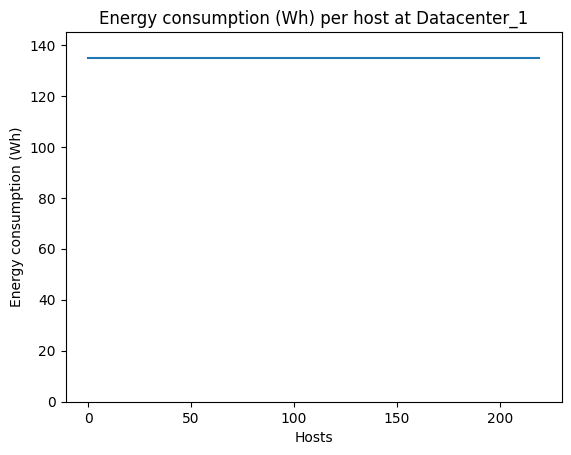

The datacenter 'Datacenter_2' current computing infrastructure at max can consume 29.7 kW per hour


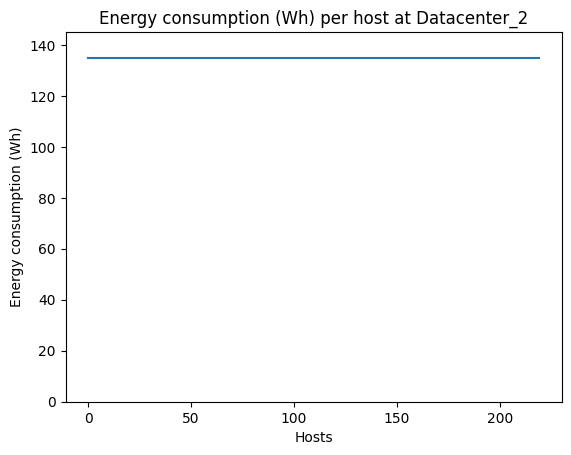

The datacenter 'Datacenter_3' current computing infrastructure at max can consume 29.7 kW per hour


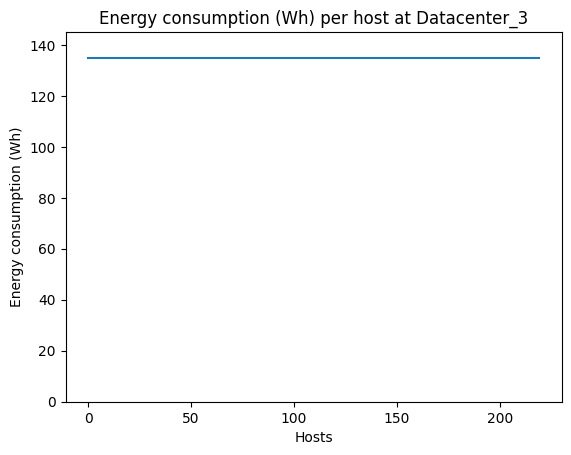

The datacenter 'Datacenter_4' current computing infrastructure at max can consume 29.7 kW per hour


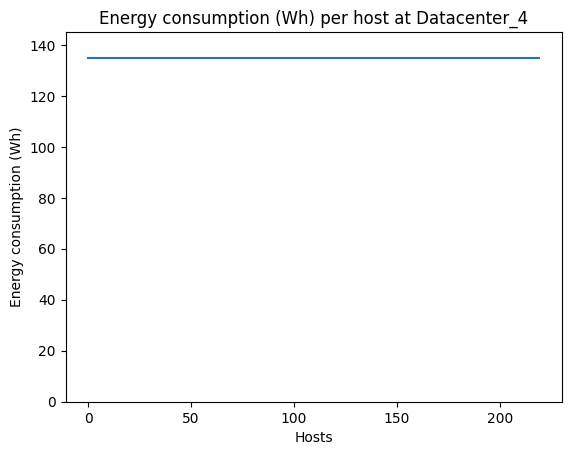

The cloud providers current computing infrastructure at max can consume 118.8 kW per hour


In [3]:
labels= np.unique(dataset['datacenter_name'])
max_power = 0
max_power_per_host = np.array([])
for i in range(len(labels)):
    max_power_per_datacenter = 0
    max_power_per_host_per_datacenter = np.array([])
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        power_model = sample['power_model'].split(",")
        max_power_per_datacenter += float(power_model[-2])
        max_power_per_host = np.append(max_power_per_host, float(power_model[-2]))
        max_power_per_host_per_datacenter = np.append(max_power_per_host_per_datacenter, float(power_model[-2]))
        
    print(f"The datacenter '{labels[i]}' current computing infrastructure at max can consume {(max_power_per_datacenter * 1)/1000} kW per hour")
    max_power += max_power_per_datacenter
    plt.plot(np.arange(0, len(max_power_per_host_per_datacenter)), (max_power_per_host_per_datacenter*1))
    plt.ylim((0, max(max_power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (Wh)")
    plt.title(f"Energy consumption (Wh) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(max_power * 1)/1000} kW per hour")

### Current Energy Consumption

The datacenter 'Datacenter_1' current computing infrastructure is consuming 29.7 kilo watts per hour


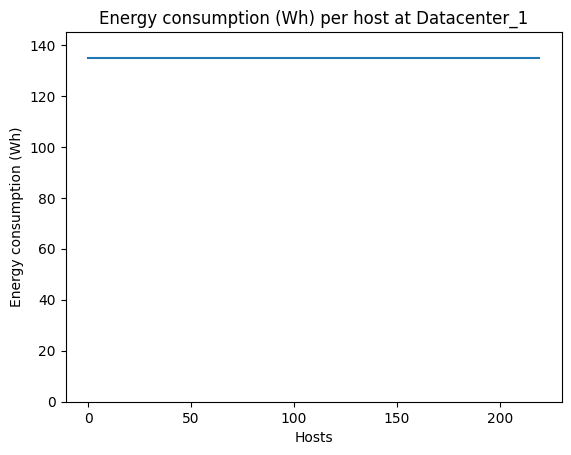

The datacenter 'Datacenter_2' current computing infrastructure is consuming 29.7 kilo watts per hour


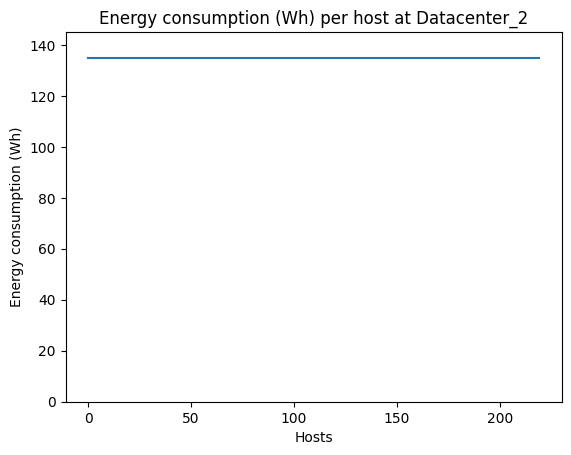

The datacenter 'Datacenter_3' current computing infrastructure is consuming 29.7 kilo watts per hour


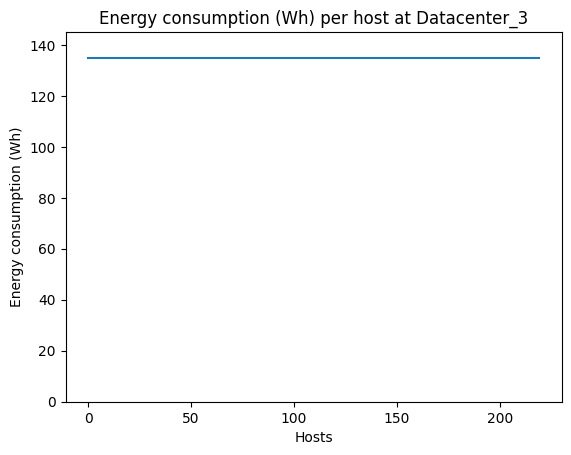

The datacenter 'Datacenter_4' current computing infrastructure is consuming 27.519 kilo watts per hour


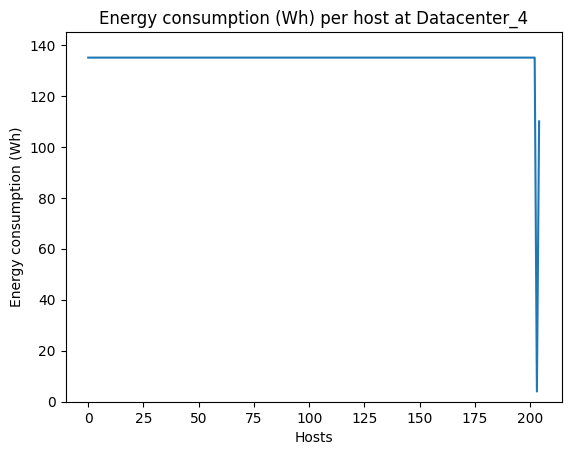

The cloud providers current computing infrastructure at max can consume 116.619 kilo watts per hour


In [4]:
labels= np.unique(dataset['datacenter_name'])
power = 0
power_per_host = np.array([])
for i in range(len(labels)):
    power_per_datacenter = 0
    power_per_host_per_datacenter = np.array([])
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        power_model = sample['power_model'].split(",")
        if sample['active'] == False:
            continue
        
        utilization = (sample['mips'] - sample['available_mips'])/sample['mips']
        if utilization % 0.1 == 0:
            host_power = utilization * 10
            power_per_datacenter += host_power
            power_per_host = np.append(power_per_host, host_power)
            power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, host_power)
        
        utilization_floor = int(math.floor(utilization * 10))
        utilization_ceil = int(math.ceil(utilization * 10))
        power_floor = float(power_model[utilization_floor])
        power_ceil = float(power_model[utilization_ceil])
        
        diff = (power_ceil - power_floor) / 10
        host_power = power_floor + diff * (utilization - utilization_floor / 10) * 100
        
        power_per_datacenter += host_power
        power_per_host = np.append(power_per_host, host_power)
        power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, host_power)
        
    print(f"The datacenter '{labels[i]}' current computing infrastructure is consuming {(power_per_datacenter * 1)/1000} kilo watts per hour")
    power += power_per_datacenter
    plt.plot(np.arange(0, len(power_per_host_per_datacenter)), (power_per_host_per_datacenter*1))
    
    plt.ylim((0, max(power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (Wh)")
    plt.title(f"Energy consumption (Wh) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(power * 1)/1000} kilo watts per hour")

### Min Energy consumption (Reducing the available CPU utilization) 

Note this would be done through approaches such as DVFS or Dynamic Voltage Frequency Scaling to reduce the available number of instructions per second by adjusting the CPU clock speed.

The datacenter 'Datacenter_1' current computing infrastructure is consuming 29.7 kilo watts per hour


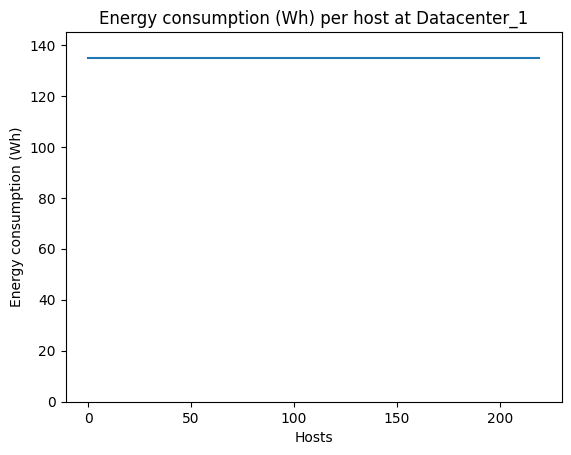

The datacenter 'Datacenter_2' current computing infrastructure is consuming 29.7 kilo watts per hour


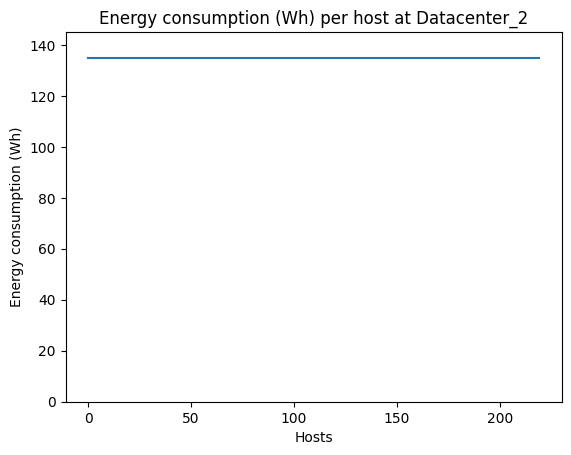

The datacenter 'Datacenter_3' current computing infrastructure is consuming 29.7 kilo watts per hour


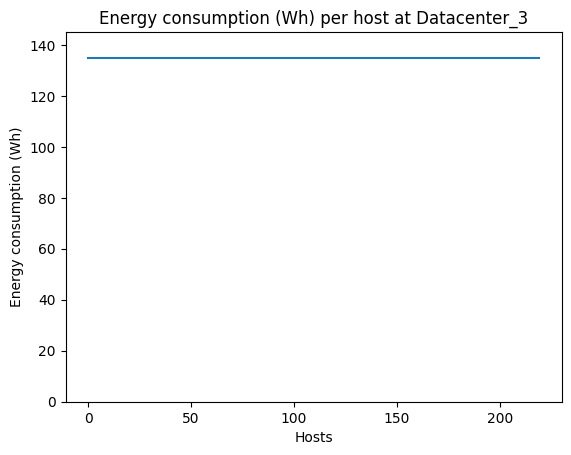

The datacenter 'Datacenter_4' current computing infrastructure is consuming 29.014420000000012 kilo watts per hour


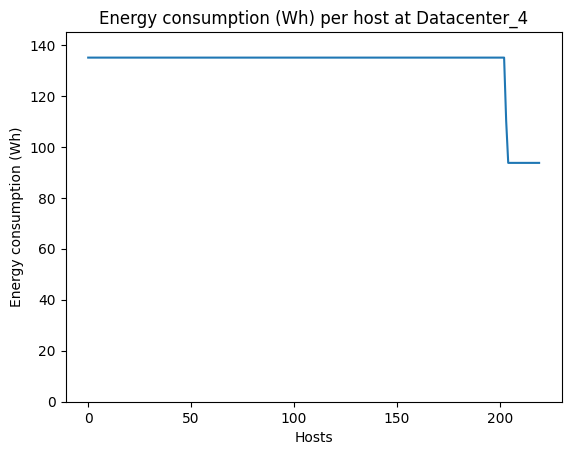

The cloud providers current computing infrastructure at max can consume 110.076 kilo watts per hour


In [5]:
labels= np.unique(dataset['datacenter_name'])

# Energy-aware simulation with DVFS
# Power_total = (1 - utilization)*power_idle + utilization*power_full
# 1.60 1.867 2.133 2.40 2.67 (GHz) (Frequecy)
# 1498 1748 1997 2247 2500 (MIPS)
# 82.70 82.85 82.95 83.10 83.25 (Watts) (CPU idle)
# 88.77 92.00 95.50 99.45 103.0 (Watts) (CPU Full)
DVFS_power = 0
DVFS_power_per_host = np.array([])
for i in range(len(labels)):
    DVFS_power_per_datacenter = 0
    DVFS_power_per_host_per_datacenter = np.array([])
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        power_model = sample['power_model'].split(",")
        
        DVFS_utilization = (sample['mips'] - sample['available_mips'])/sample['mips']
        # if DVFS_utilization % 0.1 == 0:
        #     DVFS_host_power = DVFS_utilization * 10
        #     # power_per_datacenter += host_power
        #     # power_per_host = np.append(power_per_host, host_power)
        #     # power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, host_power)
        # else:
        #     DVFS_utilization_floor = int(math.floor(utilization * 10))
        #     DVFS_utilization_ceil = int(math.ceil(utilization * 10))
        #     DVFS_power_floor = float(power_model[DVFS_utilization_floor])
        #     DVFS_power_ceil = float(power_model[DVFS_utilization_ceil])
            
        #     DVFS_diff = (DVFS_power_ceil - DVFS_power_floor) / 10
        #     DVFS_host_power = DVFS_power_floor + DVFS_diff * (DVFS_utilization - DVFS_utilization_floor / 10) * 100
        DVFS_host_power = (1 - DVFS_utilization) * float(power_model[0]) + DVFS_utilization * float(power_model[-2])
        DVFS_power_per_datacenter += DVFS_host_power
        DVFS_power_per_host = np.append(DVFS_power_per_host, DVFS_host_power)
        DVFS_power_per_host_per_datacenter = np.append(DVFS_power_per_host_per_datacenter, DVFS_host_power)
        
    print(f"The datacenter '{labels[i]}' current computing infrastructure is consuming {(DVFS_power_per_datacenter * 1)/1000} kilo watts per hour")
    DVFS_power += power_per_datacenter
    plt.plot(np.arange(0, len(DVFS_power_per_host_per_datacenter)), (DVFS_power_per_host_per_datacenter*1))
    
    plt.ylim((0, max(DVFS_power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (Wh)")
    plt.title(f"Energy consumption (Wh) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(DVFS_power * 1)/1000} kilo watts per hour")

### Min Energy consumption (Reducing the number of hosts of active hosts) 

Note! here host that are not utilized are assumed to be powered off to reduce to illustrate the energy efficiency of powering off inactive servers 

The datacenter 'Datacenter_1' current computing infrastructure is consuming 29.7 kilo watts per hour


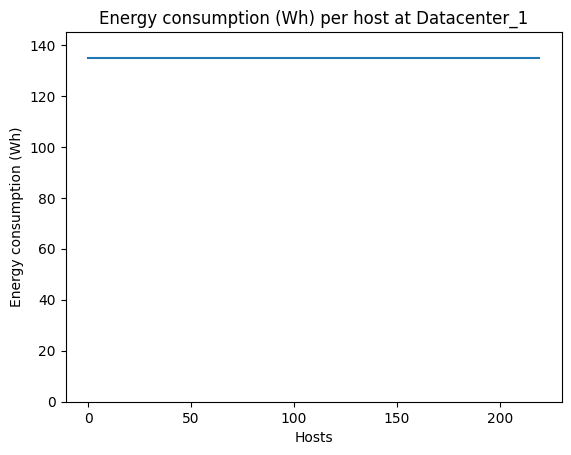

The datacenter 'Datacenter_2' current computing infrastructure is consuming 29.7 kilo watts per hour


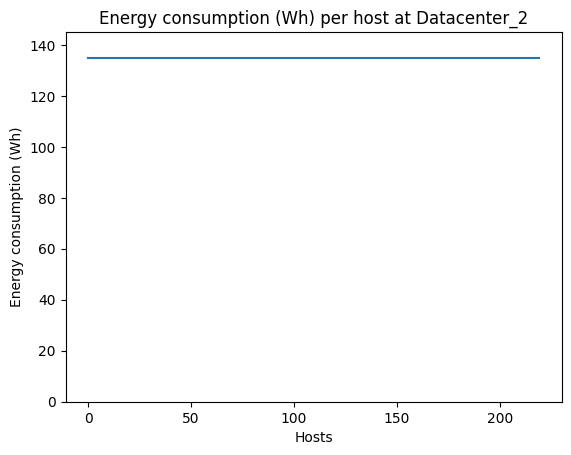

The datacenter 'Datacenter_3' current computing infrastructure is consuming 29.7 kilo watts per hour


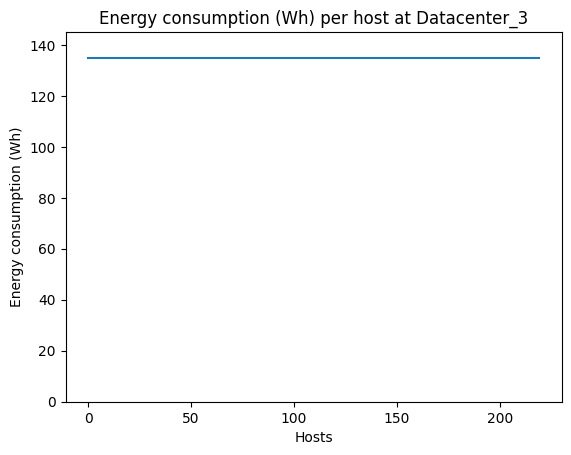

The datacenter 'Datacenter_4' current computing infrastructure is consuming 29.279 kilo watts per hour


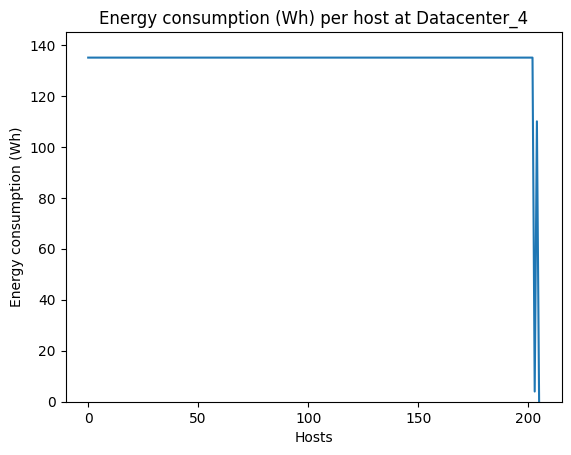

The cloud providers current computing infrastructure at max can consume 118.379 kilo watts per hour


In [6]:
labels= np.unique(dataset['datacenter_name'])
min_host_power = 0
min_host_power_per_host = np.array([])
for i in range(len(labels)):
    min_host_power_per_datacenter = 0
    min_host_power_per_host_per_datacenter = np.array([])
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        power_model = sample['power_model'].split(",")
        
        if sample['available_mips'] == sample['mips']:
            min_host_host_power = 0
            min_host_power_per_datacenter += host_power
            min_host_power_per_host = np.append(power_per_host, host_power)
            min_host_power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, min_host_host_power)
            continue
        
        min_host_utilization = (sample['mips'] - sample['available_mips'])/sample['mips']
        if min_host_utilization % 0.1 == 0:
            min_host_host_power = min_host_utilization * 10
            min_host_power_per_datacenter += min_host_host_power
            min_host_power_per_host = np.append(min_host_power_per_host, min_host_host_power)
            min_host_power_per_host_per_datacenter = np.append(min_host_power_per_host_per_datacenter, min_host_host_power)
        
        min_host_utilization_floor = int(math.floor(min_host_utilization * 10))
        min_host_utilization_ceil = int(math.ceil(min_host_utilization * 10))
        min_host_power_floor = float(power_model[min_host_utilization_floor])
        min_host_power_ceil = float(power_model[min_host_utilization_ceil])
        
        min_host_diff = (min_host_power_ceil - min_host_power_floor) / 10
        min_host_host_power = min_host_power_floor + min_host_diff * (min_host_utilization - min_host_utilization_floor / 10) * 100
        
        min_host_power_per_datacenter += min_host_host_power
        min_host_power_per_host = np.append(min_host_power_per_host, min_host_host_power)
        min_host_power_per_host_per_datacenter = np.append(min_host_power_per_host_per_datacenter, min_host_host_power)
        
    print(f"The datacenter '{labels[i]}' current computing infrastructure is consuming {(min_host_power_per_datacenter * 1)/1000} kilo watts per hour")
    min_host_power += min_host_power_per_datacenter
    plt.plot(np.arange(0, len(min_host_power_per_host_per_datacenter)), (min_host_power_per_host_per_datacenter*1))
    
    plt.ylim((0, max(min_host_power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (Wh)")
    plt.title(f"Energy consumption (Wh) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(min_host_power * 1)/1000} kilo watts per hour")

### Combined (optimal)

### Comparativ